# Convert pixels to image files

This notebook is meant to convert pixel csv files to images for the purposes of data generation.

In [62]:
import pandas as pd

df = pd.read_csv('../Sergey/Data/fer2013.csv')
df2 = df[(df['emotion']==1)]
df3 = df2.drop(['emotion','Usage'],axis=1)
df4 = df3['pixels'].str.split(' ', expand=True)
im_l = df4.to_numpy()

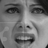

In [61]:
image

In [65]:
import numpy as np
import PIL
import matplotlib.pyplot as plt

for x in range(len(im_l)):
    # load the data
    # im_l = np.genfromtxt('./Data/sample_data_ten.csv', delimiter=',')
    # resphape the data
    # img = np.reshape(im_l, (256,256,3)) # change 256's according to your data
    img = np.reshape(im_l[x], (48,48)) # change 256's according to your data

    # visualize the data
#     plt.figure
#     plt.imshow(img)

    # finally save the image as jpg file
    # image = PIL.Image.fromarray(img.astype('uint8'), 'RGB')
    image = PIL.Image.fromarray(img.astype('uint8'))
    image.save(f'./Outputs/1_Disgust/my_im{x}.jpg')

In [24]:
from PIL import Image

image = Image.fromarray(im_l)
image

ValueError: Could not save to PNG for display

<PIL.Image.Image image mode=F size=1x2304 at 0x1FE7E8F6A90>

In [6]:
import pandas as pd

df = pd.read_csv('./Data/sample_data_ten.csv')
df

,Unnamed: 0,emotion,pixels,Usage
0,0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training


C:\Users\srobi\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  del sys.path[0]


IndexError: single positional indexer is out-of-bounds

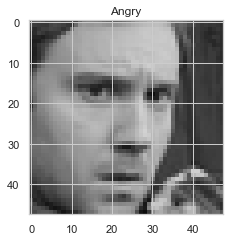

In [7]:
# import seaborn as sns
# sns.set_theme(style = "whitegrid")

emotion_map = {0: 'Angry', 1: 'Digust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
def row2image(row):
    pixels, emotion = row['pixels'], emotion_map[row['emotion']]
    img = np.array(pixels.split())
    img = img.reshape(48,48)
    image = np.zeros((48,48,3))
    image[:,:,0] = img
    image[:,:,1] = img
    image[:,:,2] = img
    return np.array([image.astype(np.uint8), emotion])

plt.figure(0, figsize=(16,10))
for i in range(1,8):
    face = df[df['emotion'] == i-1].iloc[0]
    img = row2image(face)
    plt.subplot(2,4,i)
    plt.imshow(img[0])
    plt.title(img[1])

plt.show()  